In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r'supermarket_sales - Sheet1.csv',encoding="ISO-8859-1",sep=',')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:
df.isnull().sum()
#checked that no missing values in the dataset


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [3]:
print(df['Gender'].value_counts()['Male'])
print(df['Gender'].value_counts()['Female'])
print(df['Customer type'].value_counts()['Member'])
#499 Male and 501 Female did purchases from the supermarket , 501 are memeber and 499 are normal people

499
501
501


<AxesSubplot:title={'center':'Bar plot of Gender'}, xlabel='Gender', ylabel='Frequency'>

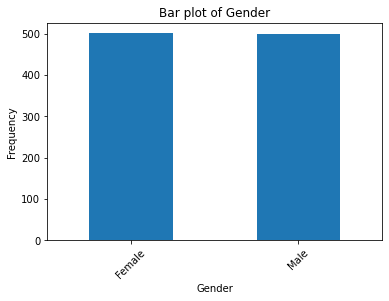

In [4]:
#Data visualization stage
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Bar plot of Gender")
vc=df["Gender"].value_counts()
vc.plot.bar(rot=45)
#bar plot to show the number of males and females who buy from the supermarket
#From the graph below , it shows that the ratio is 1:1
#Offers ideas must target both gender

<AxesSubplot:title={'center':'Bar plot of Branches'}, xlabel='Branch', ylabel='Frequency'>

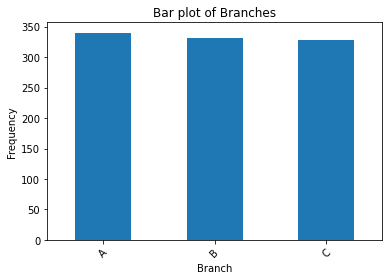

In [5]:
plt.xlabel("Branch")
plt.ylabel("Frequency")
plt.title("Bar plot of Branches")
data=df['Branch'].value_counts()
data.plot.bar(rot=45)
#it seems that the number of purchases from branch A is higher than branches B & C
#However the purchases from the 3 branches are close #which means that the 3 branches have the same priority 

(array([0, 1]), [Text(0, 0, 'Member'), Text(1, 0, 'Normal')])

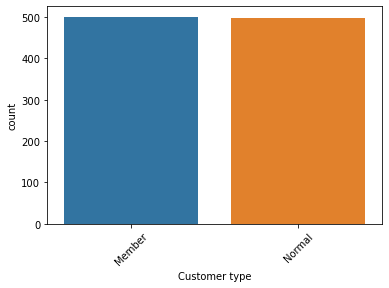

In [6]:
#barplot using seaborn shows number of members and normal people who made purchases from the supermarket
sns.countplot(x='Customer type',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

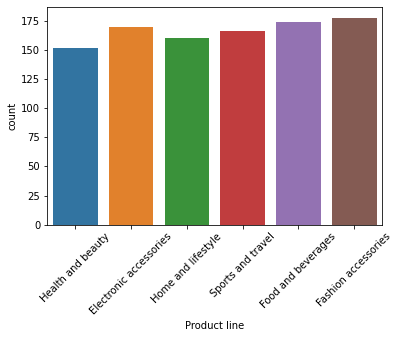

In [7]:
#Among the 3 branches the barplot shows the number of products of each type bought by the customers 
sns.countplot(x='Product line',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Ewallet'), Text(1, 0, 'Cash'), Text(2, 0, 'Credit card')])

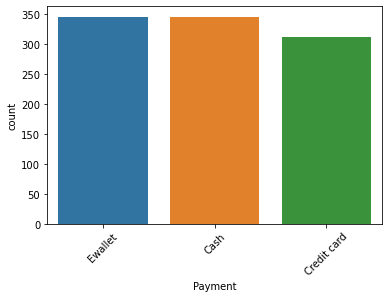

In [8]:
sns.countplot(x='Payment',data=df)
plt.xticks(rotation=45)
#It seems that customer pay using ewallet & cash method more than using their credit cards

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='Quantity', ylabel='Frequency'>

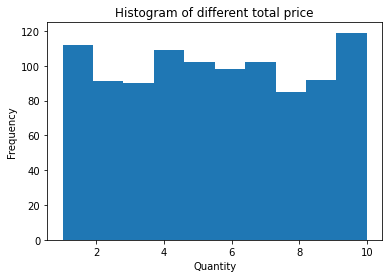

In [9]:
plt.title("Histogram of different total price")
plt.xlabel("Quantity")
df["Quantity"].plot.hist()
#this histogram shows the number of quantities bought 

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='Unit price', ylabel='Frequency'>

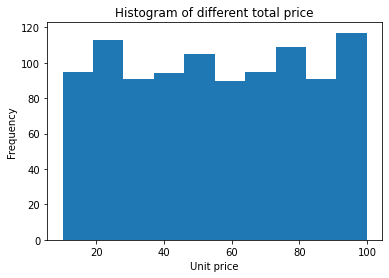

In [10]:
plt.title("Histogram of different total price")
plt.xlabel("Unit price")
df["Unit price"].plot.hist()

C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit price', ylabel='Density'>

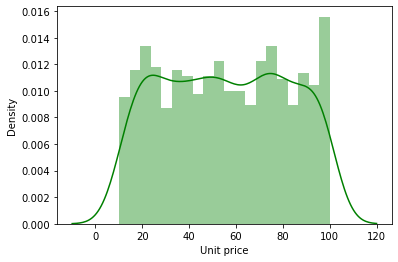

In [11]:
sns.distplot(df["Unit price"],bins=20,hist=True,kde=True,color="green")
#different view of histogram

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='gross margin percentage', ylabel='Frequency'>

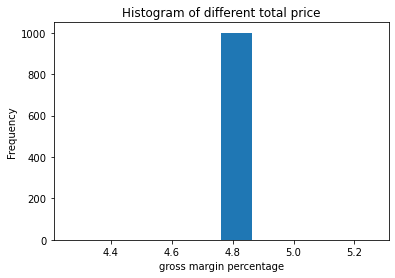

In [12]:
plt.title("Histogram of different total price")
plt.xlabel("gross margin percentage")
df["gross margin percentage"].plot.hist()

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='gross income', ylabel='Frequency'>

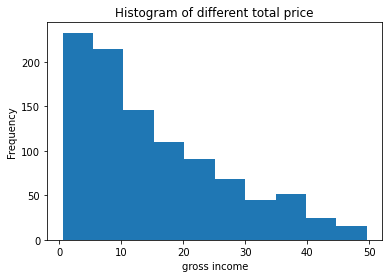

In [13]:
plt.title("Histogram of different total price")
plt.xlabel("gross income")
df["gross income"].plot.hist()

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='Rating', ylabel='Frequency'>

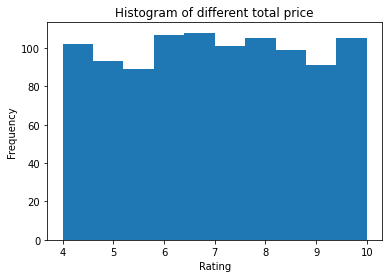

In [14]:
plt.title("Histogram of different total price")
plt.xlabel("Rating")
df["Rating"].plot.hist()
#Rating of the product

<AxesSubplot:title={'center':'Histogram of different total price'}, xlabel='cogs', ylabel='Frequency'>

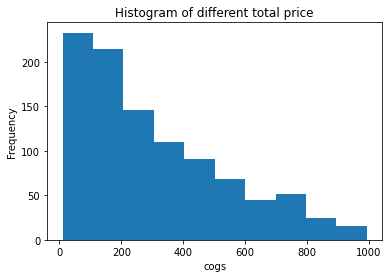

In [15]:
plt.title("Histogram of different total price")
plt.xlabel("cogs")
df["cogs"].plot.hist()
#cost of goods

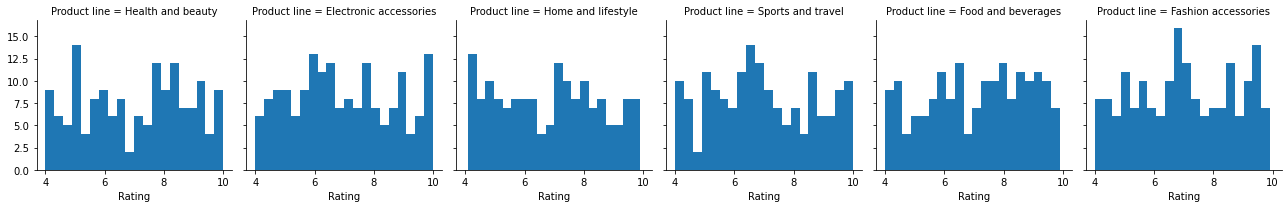

In [16]:
g=sns.FacetGrid(df,col='Product line')
g.map(plt.hist,'Rating',bins=20)
#Ratung of the products

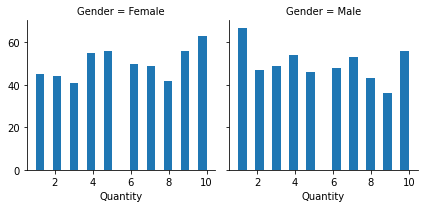

In [17]:
g=sns.FacetGrid(df,col='Gender')
g.map(plt.hist,'Quantity',bins=20)
#Male who buy 1 product is more than females who buy 1 product
#female who buy 10 products are more than male who buys 10 products

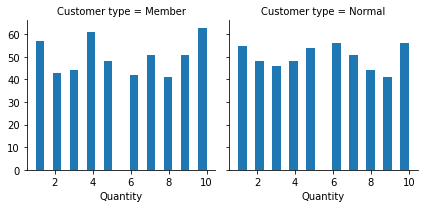

In [18]:
g=sns.FacetGrid(df,col='Customer type')
g.map(plt.hist,'Quantity',bins=20)

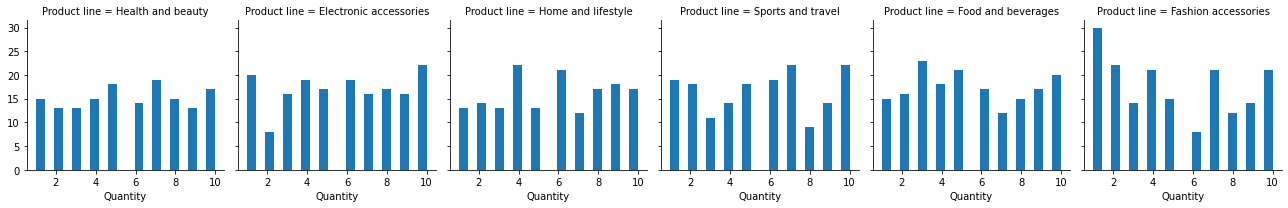

In [19]:
g=sns.FacetGrid(df,col='Product line')
g.map(plt.hist,'Quantity',bins=20)

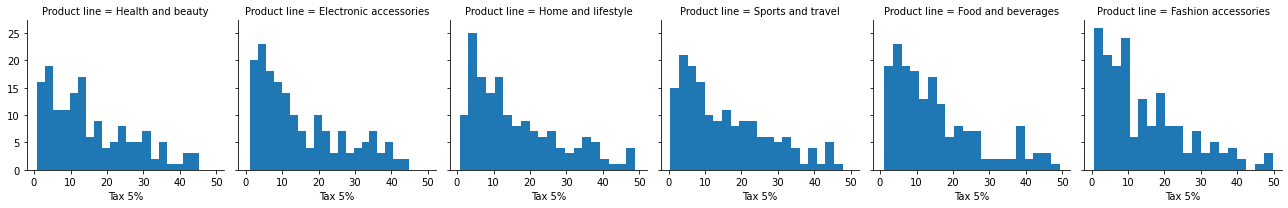

In [20]:
g=sns.FacetGrid(df,col='Product line')
g.map(plt.hist,'Tax 5%',bins=20)

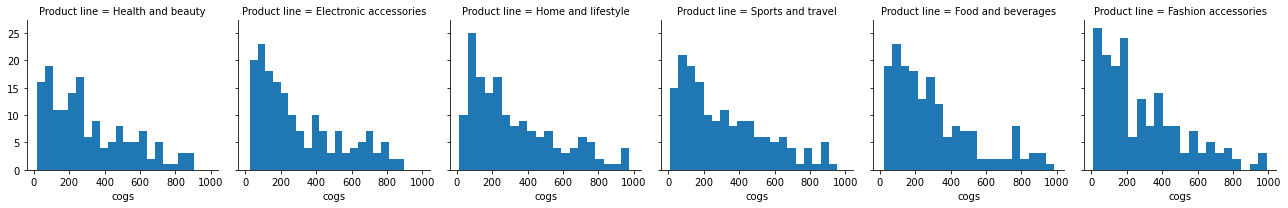

In [21]:
g=sns.FacetGrid(df,col='Product line')
g.map(plt.hist,'cogs',bins=20)
#cogs is the cost of goods

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Product line']=encoder.fit_transform(df['Product line'])

In [23]:
#Turning categorical values into numerical values
clean = { "Gender" : {"Female" : 1,"Male" : 0},"Customer type" : {"Member" : 1,"Normal" : 0},"Branch" : {"A":0 ,"B":1,"C":2} }
df.replace(clean,inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,Yangon,1,1,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,Naypyitaw,0,1,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,Yangon,0,0,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,Yangon,1,0,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,Yangon,0,0,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,Naypyitaw,0,0,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,Mandalay,0,1,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,Yangon,1,0,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,Yangon,0,0,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


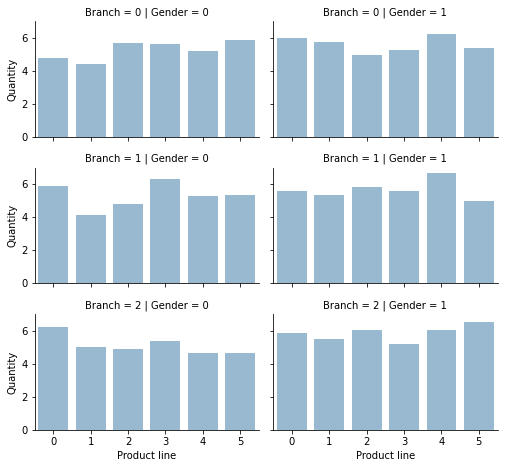

In [24]:
grid = sns.FacetGrid(df, row="Branch", col="Gender", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Product line","Quantity", alpha=.5, ci=None)
grid.add_legend()

C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


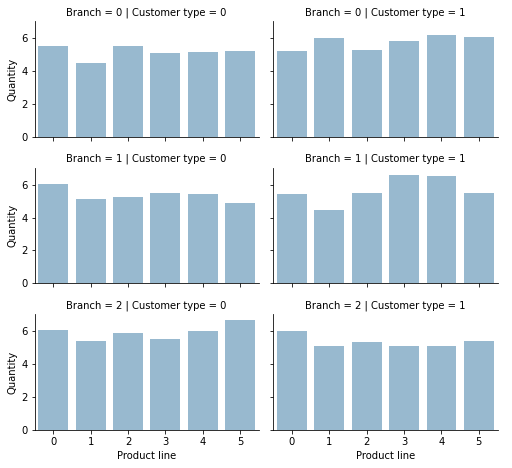

In [25]:
grid = sns.FacetGrid(df, row="Branch", col="Customer type", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Product line","Quantity", alpha=.5, ci=None)
grid.add_legend()

C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\G A M I O N\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


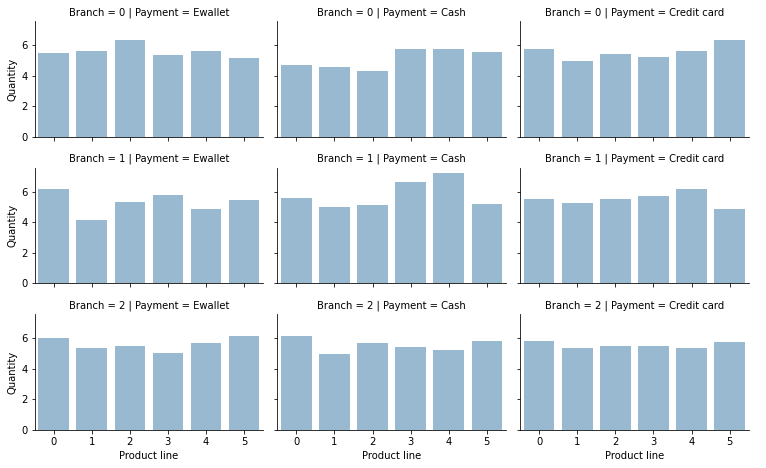

In [26]:
grid = sns.FacetGrid(df, row="Branch", col="Payment", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Product line","Quantity", alpha=.5, ci=None)
grid.add_legend()

In [27]:
#supervised machine learning 

In [28]:
x=df["cogs"].values[:,np.newaxis]
y=df["Total"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) 

model=LinearRegression()  
model.fit(x_train,y_train) 
predicted=model.predict(x_test)


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 6.107550454838326e-27
R squared 1.0


In [29]:
"""#extract x and y from our data
x=df["Unit price"].values[:,np.newaxis]
y=df["Product line"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))"""

'#extract x and y from our data\nx=df["Unit price"].values[:,np.newaxis]\ny=df["Product line"].values\n\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%\n\nmodel=LinearRegression()   #build linear regression model\nmodel.fit(x_train,y_train)  #fitting the training data\npredicted=model.predict(x_test) #testing our model’s performance\n\n\nprint("MSE", mean_squared_error(y_test,predicted))\nprint("R squared", metrics.r2_score(y_test,predicted))'

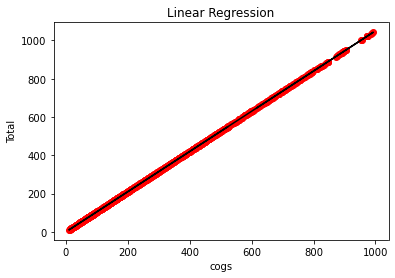

In [30]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Total")
plt.xlabel("cogs")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = df[['Quantity','Rating']]
y = df['Gender']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.50


<AxesSubplot:xlabel='Quantity', ylabel='Gender'>

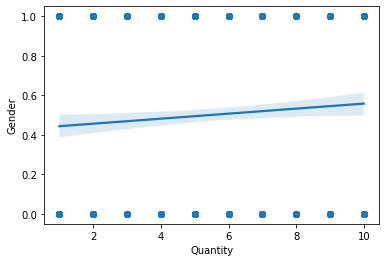

In [32]:
import seaborn as sns
sns.regplot(x='Quantity',y='Gender',data=df)

' 64 is true positive as the model predicted that the gender is male and it was right \n61 is false positive where the model predict that the gender is male and it was wrong \n63 False Negative is where the model predicted that the gender was not female and it was wrong\n61 is true negative where the model predicted that the gender was not female and it was right  '

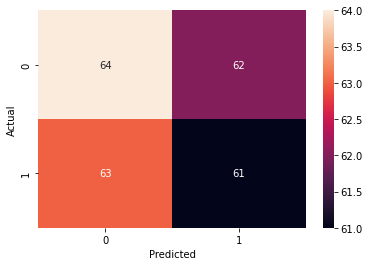

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
""" 64 is true positive as the model predicted that the gender is male and it was right 
61 is false positive where the model predict that the gender is male and it was wrong 
63 False Negative is where the model predicted that the gender was not female and it was wrong
61 is true negative where the model predicted that the gender was not female and it was right  """

In [34]:
x = df[['Quantity','Rating']]
y = df['Customer type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=0) 

logreg = LogisticRegression()   
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.48


<AxesSubplot:xlabel='Quantity', ylabel='Customer type'>

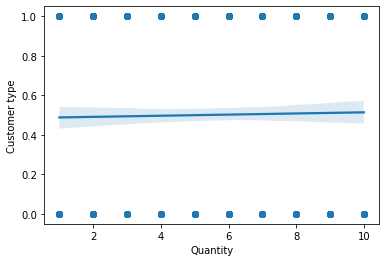

In [35]:
import seaborn as sns
sns.regplot(x='Quantity',y='Customer type',data=df)

' 23 is true positive as the model predicted that the customer is normal and it was right \n25 is false positive where the model predict that the customer was normal and it was wrong \n27 False Negative is where the model predicted that the customer was not member and it was wrong\n25 is true negative where the model predicted that the customer was not member and it was right  '

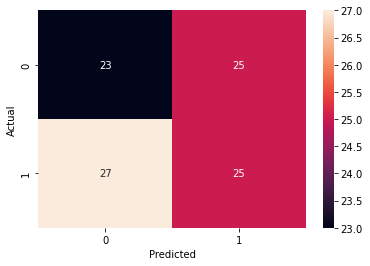

In [36]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
""" 23 is true positive as the model predicted that the customer is normal and it was right 
25 is false positive where the model predict that the customer was normal and it was wrong 
27 False Negative is where the model predicted that the customer was not member and it was wrong
25 is true negative where the model predicted that the customer was not member and it was right  """

In [37]:


#Choosing the features as x and the target as y
x=df[['Customer type']]
y=df['Branch']
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=30) 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.36


In [38]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.36
Accuracy for k= 2 is: 0.36
Accuracy for k= 3 is: 0.35
Accuracy for k= 4 is: 0.35
Accuracy for k= 5 is: 0.35
Accuracy for k= 6 is: 0.35
Accuracy for k= 7 is: 0.35
Accuracy for k= 8 is: 0.35
Accuracy for k= 9 is: 0.36
Accuracy for k= 10 is: 0.36
Accuracy for k= 11 is: 0.36
Accuracy for k= 12 is: 0.36
Accuracy for k= 13 is: 0.36
Accuracy for k= 14 is: 0.36
Accuracy for k= 15 is: 0.36
Accuracy for k= 16 is: 0.36
Accuracy for k= 17 is: 0.36
Accuracy for k= 18 is: 0.36
Accuracy for k= 19 is: 0.36
Accuracy for k= 20 is: 0.36
Accuracy for k= 21 is: 0.36
Accuracy for k= 22 is: 0.36
Accuracy for k= 23 is: 0.36
Accuracy for k= 24 is: 0.36
Accuracy for k= 25 is: 0.36
Accuracy for k= 26 is: 0.36
Accuracy for k= 27 is: 0.36
Accuracy for k= 28 is: 0.36
Accuracy for k= 29 is: 0.37


Text(0, 0.5, 'Testing Accuracy')

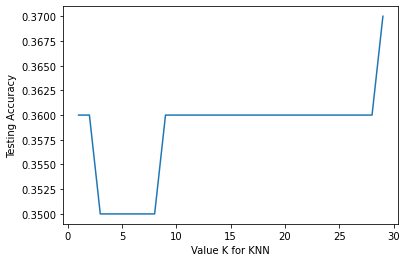

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=df.drop(["Customer type","Invoice ID","City","Unit price","Total","Tax 5%","cogs","gross margin percentage","gross income","Rating","Date","Time","Payment"], axis=1)
y= df["Customer type"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.5


In [41]:

from sklearn import tree

In [42]:
#clf = tree.DecisionTreeClassifier(random_state=0)
clf = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)

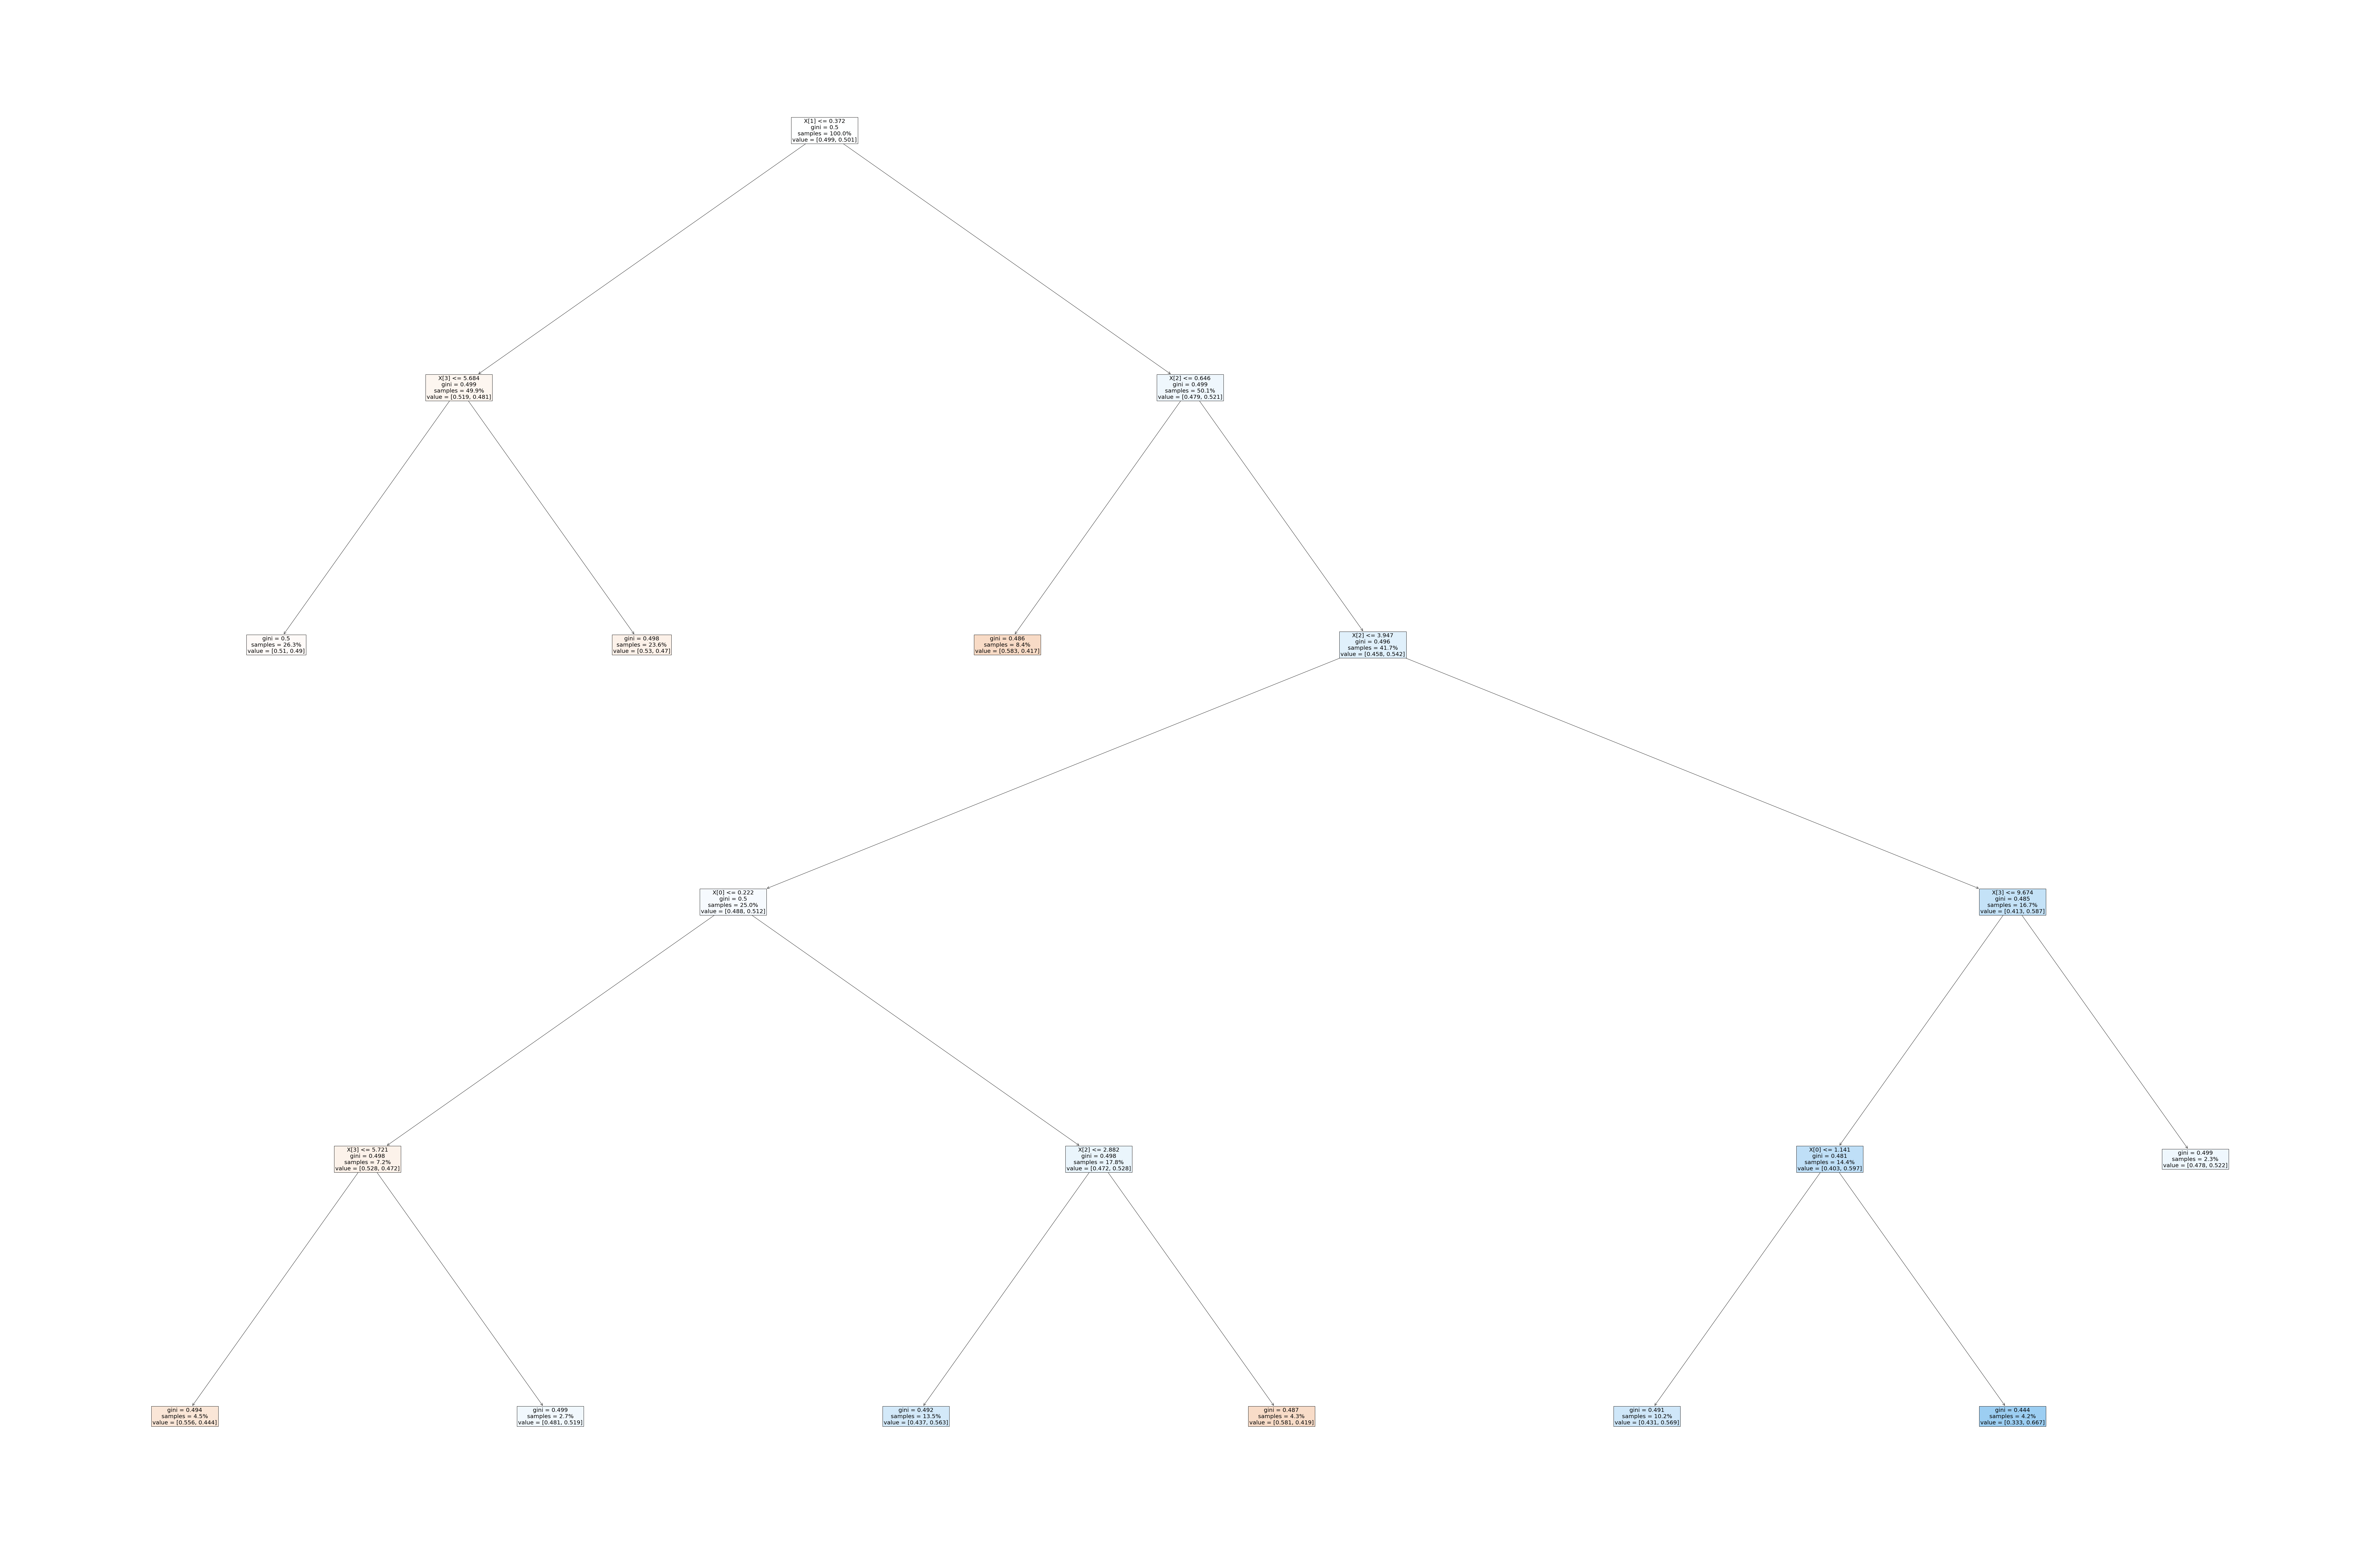

In [43]:
plt.figure(figsize=(150,100))

clf = clf.fit(x,y)
tree.plot_tree(clf,precision=3,fontsize=20,proportion=True,filled=True)
plt.show()